In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
from wordcloud import WordCloud


Carga de df

In [6]:
dtypes = {'año': str, 'id':object}
df_games = pd.read_csv(r'D:\Users\Natalia\Desktop\csv_limpios\df_games.csv', dtype=dtypes)

In [4]:
df_items = pd.read_csv(r'D:\Users\Natalia\Desktop\csv_limpios\df_items.csv')

In [5]:
dtypes = {'año_publicado': str}  # Cambiar 'str' al tipo de dato deseado, por ejemplo 'object'

# Cargar el archivo CSV con los tipos de datos especificados
df_review = pd.read_csv(r'D:\Users\Natalia\Desktop\csv_limpios\df_reviews.csv', dtype=dtypes)

In [7]:
df_games.head()

,app_name,id,año,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,Lost Summoner Kitty,761140,2018,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,Ironbound,643980,2018,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,Real Pool 3D - Poolians,670290,2017,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,弹炸人2222,767400,2017,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Log Challenge,773570,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_items.head()

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6.0
1,76561197970982479,20,Team Fortress Classic,0.0
2,76561197970982479,30,Day of Defeat,7.0
3,76561197970982479,40,Deathmatch Classic,0.0
4,76561197970982479,50,Half-Life: Opposing Force,0.0


In [9]:
df_review.head()

,user_id,item_id,recommend,sentiment_analysis,año_publicado
0,76561197970982479,1250,True,2,2011
1,76561197970982479,22200,True,2,2011
2,76561197970982479,43110,True,2,2011
3,js41637,251610,True,2,2014
4,js41637,227300,True,0,2013


In [ ]:
df_combined = pd.merge(df_review, df_items, on='item_id')


Nube de palabras de titulos (columna 'app_name')

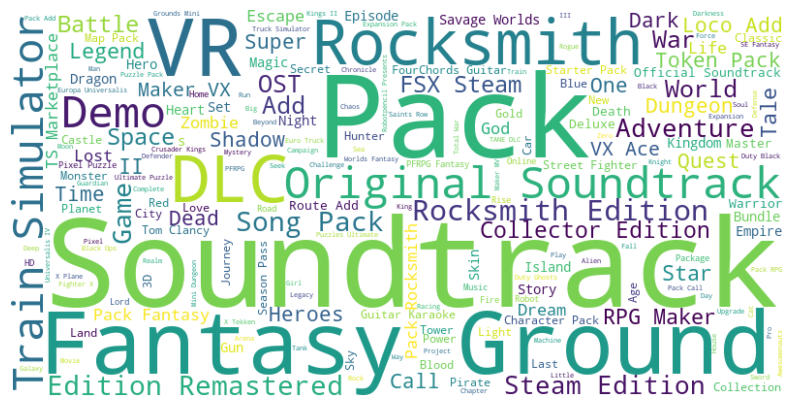

In [10]:
text = ' '.join(df_games['app_name'].astype(str).values)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras utilizando Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Porcentaje de generos

In [16]:
df_generos = df_games.drop(["app_name","id","año"],axis=1)

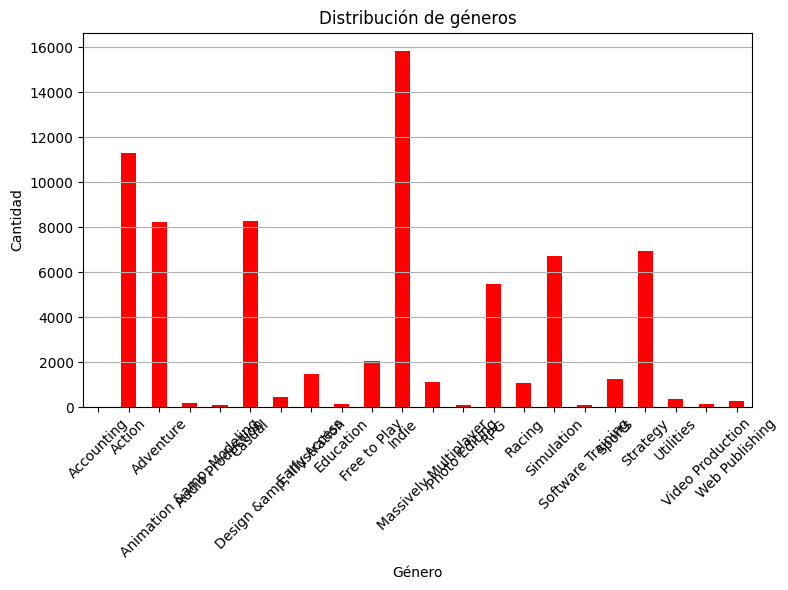

In [20]:

# Suma de las columnas binarias
sum_genres = df_generos.sum()
plt.figure(figsize=(8, 6))
sum_genres.plot(kind='bar', color='red')
plt.title('Distribución de géneros')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

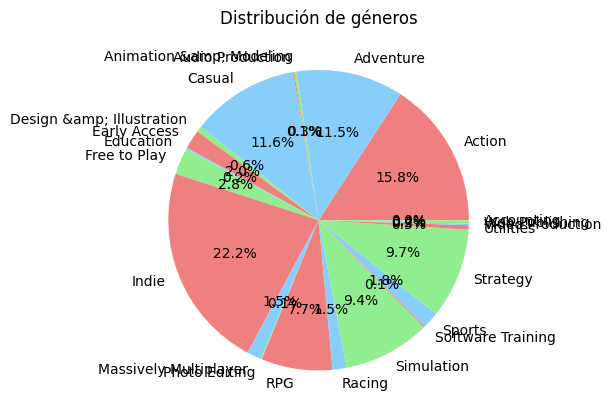

In [21]:
plt.figure(figsize=(6, 6))
sum_genres.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Distribución de géneros')
plt.ylabel('')
plt.tight_layout()
plt.show()

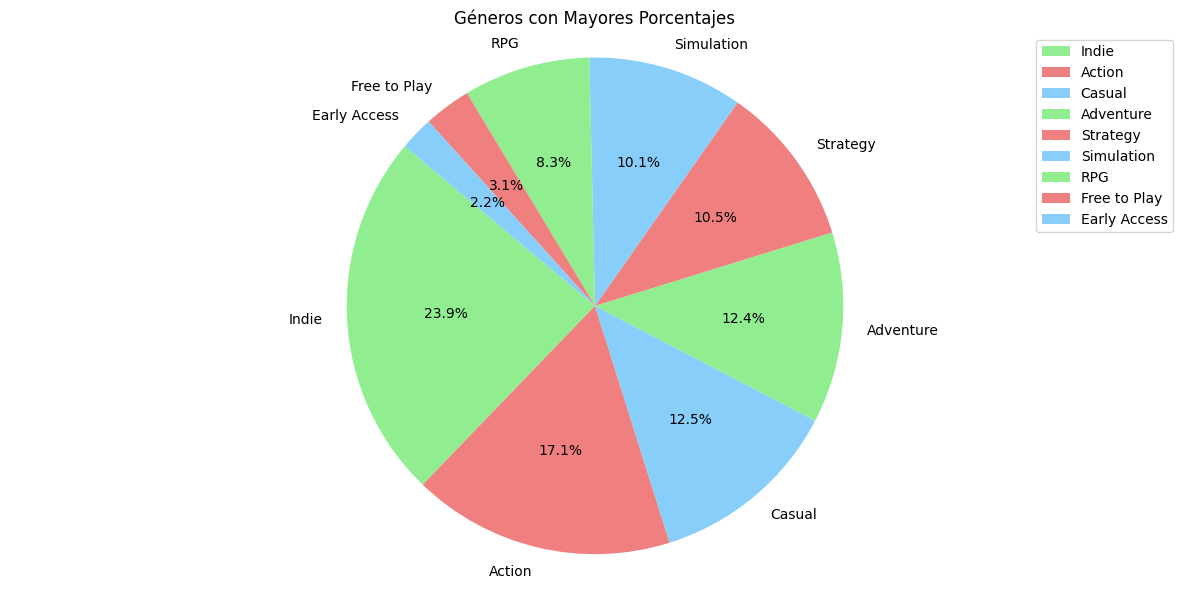

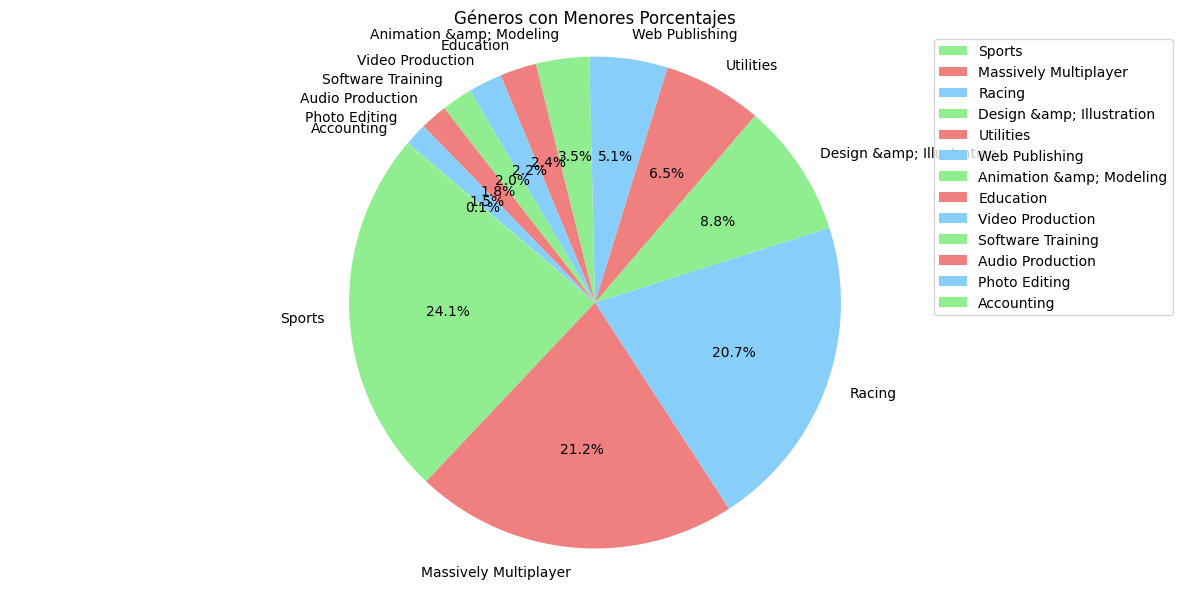

In [34]:
# Calcular la suma de cada género y los porcentajes
sum_genres = df_generos.sum()
percentages = (sum_genres / sum_genres.sum()) * 100

# Ordenar los géneros por porcentaje
sorted_genres = percentages.sort_values(ascending=False)

# Dividir los géneros en dos grupos (mayores y menores porcentajes)
top_genres = sorted_genres[sorted_genres >= 2]  # Cambia este valor según tu criterio
other_genres = sorted_genres[sorted_genres < 2]  # Cambia este valor según tu criterio

# Gráfico de torta para los géneros con mayores porcentajes
plt.figure(figsize=(12, 6))
top_genres.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue'],
                shadow=False, startangle=140)
plt.title('Géneros con Mayores Porcentajes')
plt.ylabel('')
plt.legend(labels=top_genres.index, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Gráfico de torta para los géneros con menores porcentajes
plt.figure(figsize=(12, 6))
other_genres.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue'],
                  shadow=False, startangle=140)
plt.title('Géneros con Menores Porcentajes')
plt.ylabel('')
plt.legend(labels=other_genres.index, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

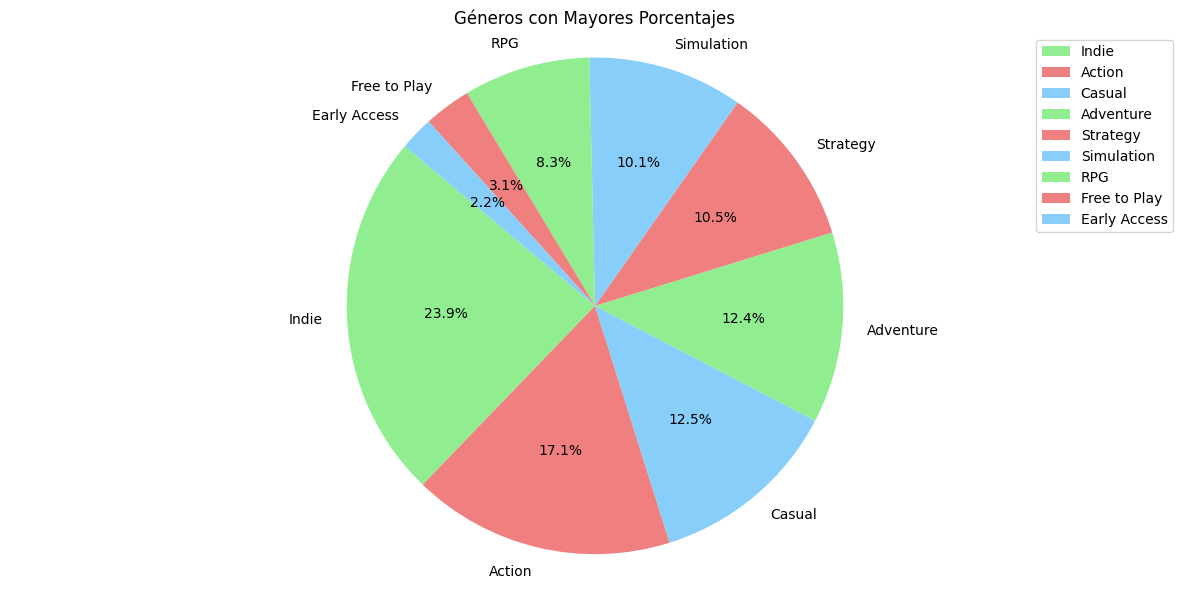

In [35]:
# Calcular la suma de cada género y los porcentajes
sum_genres = df_generos.sum()
percentages = (sum_genres / sum_genres.sum()) * 100

# Ordenar los géneros por porcentaje
sorted_genres = percentages.sort_values(ascending=False)

# Dividir los géneros en dos grupos (mayores y menores porcentajes)
top_genres = sorted_genres[sorted_genres >= 2]  # Cambia este valor según tu criterio


# Gráfico de torta para los géneros con mayores porcentajes
plt.figure(figsize=(12, 6))
top_genres.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue'],
                shadow=False, startangle=140)
plt.title('Géneros con Mayores Porcentajes')
plt.ylabel('')
plt.legend(labels=top_genres.index, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()



El genero INDIE es el más popular, seguido por ACCION. Puntualmente se puede referir a que es la etiqueta más abarcativa y general para desrivir juegos por lo que se entiende que sea la más popular.
Los juego de ACCION, AVENTURA y ESTRATEGIA  son uno de los generos más poplares, dando un perfil de cual es el tipo de juego más consumido

PORCENTAJE DE REVIES POSITIVAS, NEGATIVASA, NEUTRAS
PORCENTAJE DE JUEGOS RECOMEDADOS
GENERO CON MEJORES + RECOMENDACIONES 
GENERO CONMEJORES REEÑAS
CANTIAD DE RESEÑEÑAS POSITIVAS POR GENERO?
año con mas reeñas positivas por genero

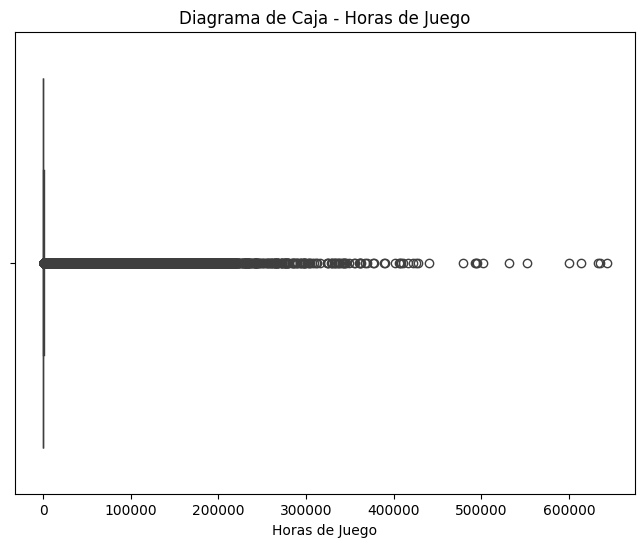

In [13]:
descripcion = df_items['playtime_forever'].describe()

# Diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_items['playtime_forever'])
plt.title('Diagrama de Caja - Horas de Juego')
plt.xlabel('Horas de Juego')
plt.show()

In [15]:
# Histograma
plt.figure(figsize=(8, 6))
sns.histplot(df_items['playtime_forever'], kde=True)
plt.title('Histograma - Horas de Juego')
plt.xlabel('Horas de Juego')
plt.ylabel('Frecuencia')
plt.show()


KeyboardInterrupt: 

In [7]:


# Calcular la media
media = df_items['playtime_forever'].mean()

# Calcular la mediana
mediana = df_items['playtime_forever'].median()

# Calcular la desviación estándar
desviacion_estandar = df_items['playtime_forever'].std()



In [10]:
print('media:', (media))
print('mediana:', (mediana))
print('desviacionestandar:', (desviacion_estandar))

media: 991.4951407947941
mediana: 34.0
desviacionestandar: 5418.204404857233


In [12]:
# Calcular los percentiles (por ejemplo, percentil 25, 50, 75)
percentil_25 = df_items['playtime_forever'].quantile(0.25)
percentil_50 = df_items['playtime_forever'].quantile(0.50)
percentil_75 = df_items['playtime_forever'].quantile(0.75)

# Imprimir las estadísticas descriptivas

print("Percentil 25:", percentil_25)
print("Percentil 50 (Mediana):", percentil_50)
print("Percentil 75:", percentil_75)


Percentil 25: 0.0
Percentil 50 (Mediana): 34.0
Percentil 75: 355.0
